<a href="https://colab.research.google.com/github/shsarv/ML-and-its-Application/blob/main/Loan_Repayment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Credit default prediction </h1>
<p><strong>Author:</strong> Reda abakhti <br>
<strong>Email:</strong> reda.abakhti2213@email.com <br>
<strong>LinkedIn:</strong> <a href="#">https://www.linkedin.com/in/reda-abakhti-4bb710167/</a><br>
<strong>GitHub:</strong> <a href="#">https://github.com/redaabakhti2023</a></p>
<hr>

### Objective:

* Predicts wether credit borrower would default the next month based on their past data 

<hr>

Acknowledgements :
Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

### Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , StratifiedKFold ,GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import accuracy_score, precision_score, recall_score,confusion_matrix,classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


#### Reading file

In [70]:
data_dir = "data"
file_path ="UCI_Credit_Card.csv"
full_path = os.path.join(data_dir, file_path)
df = pd.read_csv(full_path)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [22]:
df.shape

(30000, 25)

In [23]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

<h3>explaining the columns</h3>

   ID: ID of each client
LIMIT_BAL:  Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-2 = that there was no consumption, 0 = paid the minimum payment but might still have outstanding payment , -1= the borrower paid duly, , 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)


PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar new taiwan dollars)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

we observe that all columns are numerical and have no null values

In [26]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Checking For Null Values


In [27]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

the data has no null value

In [28]:
df['default.payment.next.month'].value_counts()  ### checking if the data is balanced 

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

remark : the data is clearly imbalanced, it is important to take this into account during modeling

# Data Visualization

In [57]:
vdf =df.drop('ID', axis=1)   ### creating the dataframe we're going to use for visualization
                             ### the ID column in non informative                             

let's check the correlation to see which columns have the most (linear) impact onthe target 

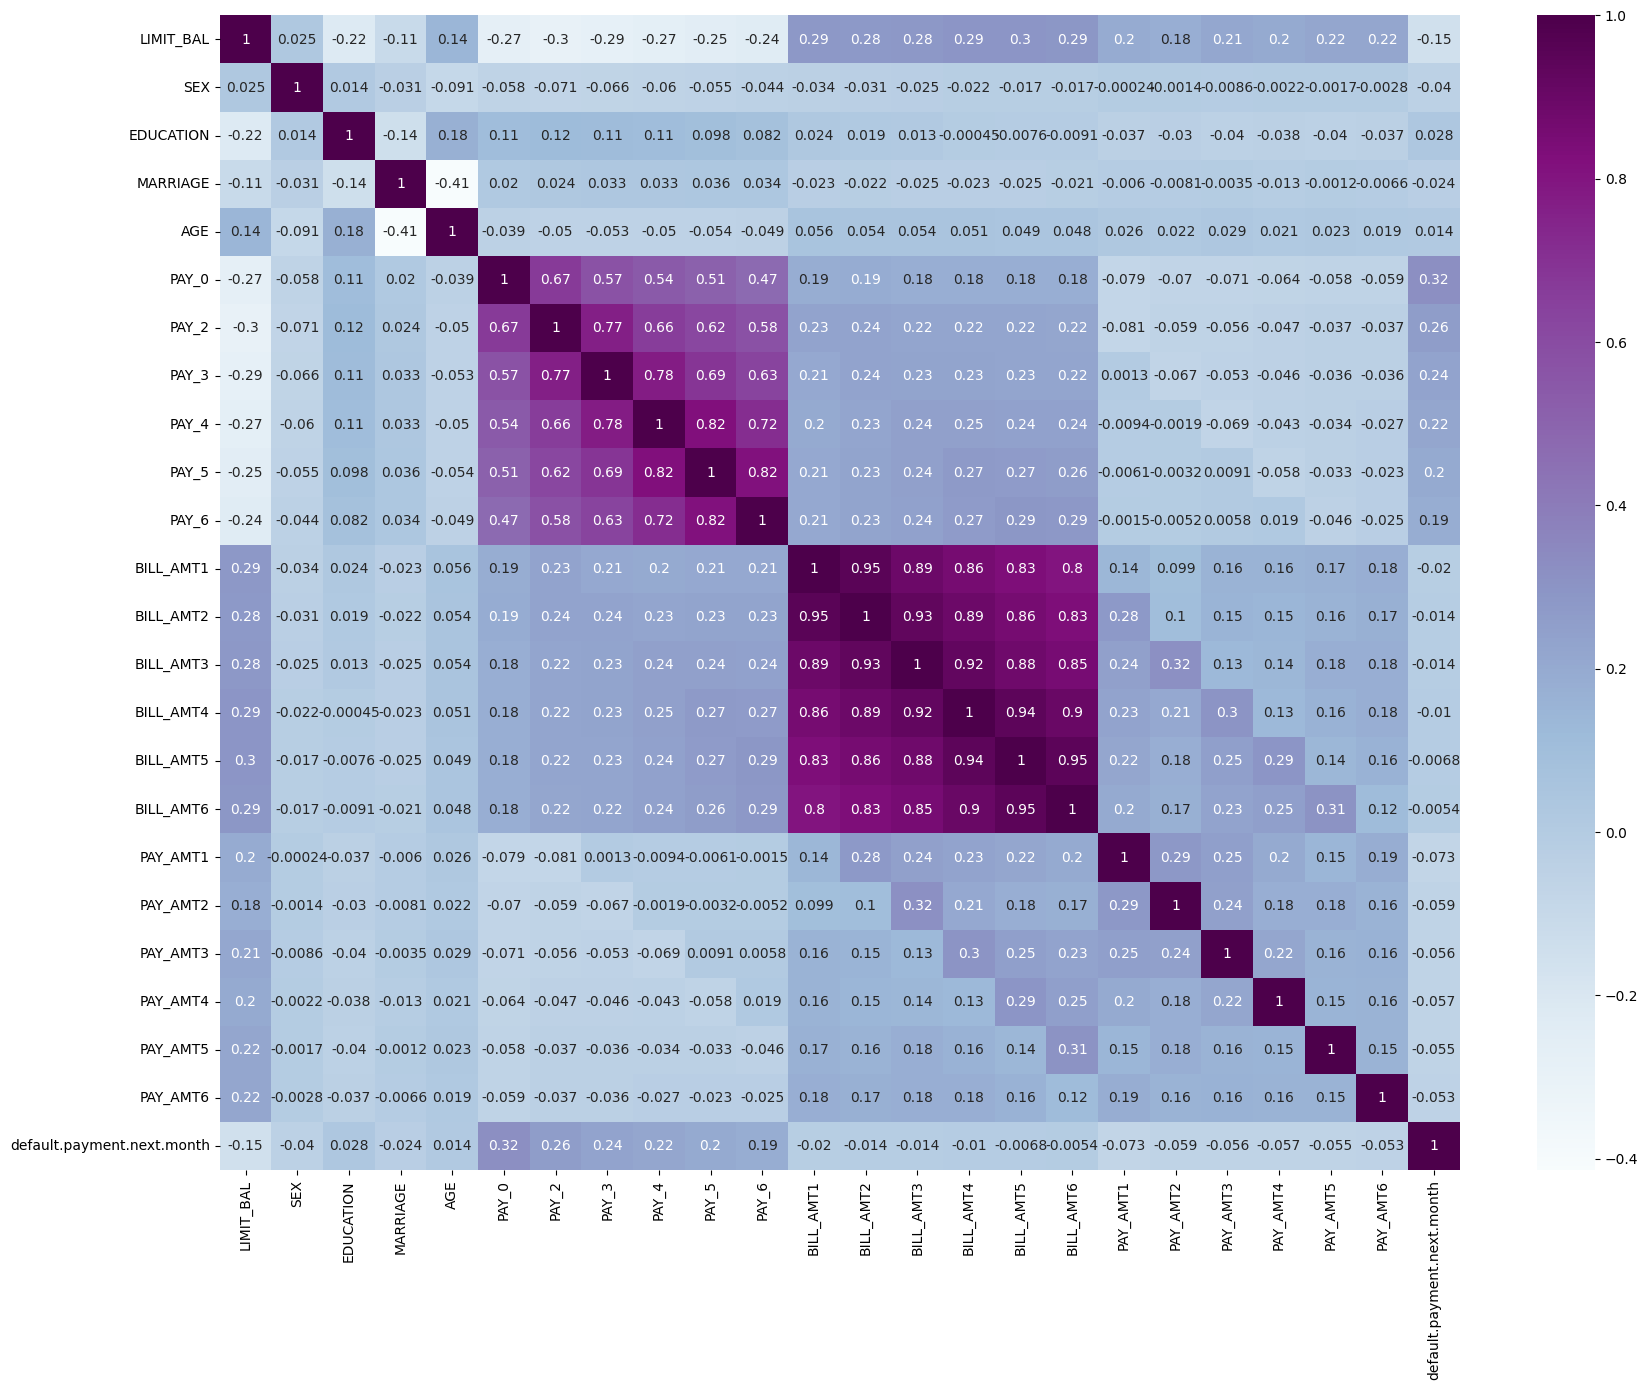

In [30]:
plt.figure(figsize = (20, 15)) 
sns.heatmap(vdf.corr(), cmap='BuPu', annot=True)
plt.show()

finding the columns which are most correlated with the target (credit default next month)

In [31]:
impacting_cols = []                    ### filtering out the columns with correlation less or equal than 6% with the target
for col in vdf.corr().columns:
    if abs(vdf.corr().loc[col,'default.payment.next.month']) > 0.06 :
        impacting_cols.append(col)

In [32]:
impacting_cols

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'default.payment.next.month']

remark : all columns except 'PAY_AMT1' and 'LIMIT_BAL' have a discrete distribution, in order to have a unified format we are going to segment the columns 'PAY_AMT1' and 'LIMIT_BAL' into intervals




### binning the data for better visualization with histograms



In [58]:
   
percentile_bins = [round(x, 1) for x in np.linspace(0.0, 1, 6)] ### creates range of percentiles values     
                                                                ### incrementing by 0.2
                                                                #truncated to 1 digit for better display
    
    
PAY_AMT1_bins =[vdf['PAY_AMT1'].quantile(p) for p in percentile_bins] ### finding the quantile values 


PAY_AMT1_labels =  [ f'{100*j:.1f}%-{100*(j+0.2):.1f}%' for j in percentile_bins[:-1] ] ### creating the labels for each interval



vdf['PAY_AMT1_bins'] = pd.cut(vdf['PAY_AMT1'], bins=PAY_AMT1_bins, labels=PAY_AMT1_labels, include_lowest =True)

LIMIT_BAL_bins = [vdf['LIMIT_BAL'].quantile(p) for p in percentile_bins] ### finding the quantile values 


LIMIT_BAL_labels = [ f'{100*j:.1f}%-{100*(j+0.2):.1f}%' for j in percentile_bins[:-1] ] ### creating the labels for each interval

vdf['LIMIT_BAL_bins'] = pd.cut(vdf['LIMIT_BAL'], bins=LIMIT_BAL_bins, labels=LIMIT_BAL_labels, include_lowest =True)

vdf[['PAY_AMT1_bins','LIMIT_BAL_bins']]

,PAY_AMT1_bins,LIMIT_BAL_bins
0,0.0%-20.0%,0.0%-20.0%
1,0.0%-20.0%,40.0%-60.0%
2,20.0%-40.0%,20.0%-40.0%
3,40.0%-60.0%,0.0%-20.0%
4,40.0%-60.0%,0.0%-20.0%
...,...,...
29995,80.0%-100.0%,60.0%-80.0%
29996,40.0%-60.0%,40.0%-60.0%
29997,0.0%-20.0%,0.0%-20.0%
29998,80.0%-100.0%,20.0%-40.0%


In [9]:
impacting_cols_bins =[]   ### the list impacting_cols_bins is the same as impacting_colswit the exception of 
                          ### 'LIMIT_BAL'and 'PAY_AMT1' being replaced by  'PAY_AMT1_bins' and'LIMIT_BAL_bins'

for col in impacting_cols:
    if col in ['LIMIT_BAL','PAY_AMT1'] :
        impacting_cols_bins.append(col + "_bins")
    else:
        impacting_cols_bins.append(col)
    
print(impacting_cols_bins)    

['LIMIT_BAL_bins', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1_bins', 'default.payment.next.month']


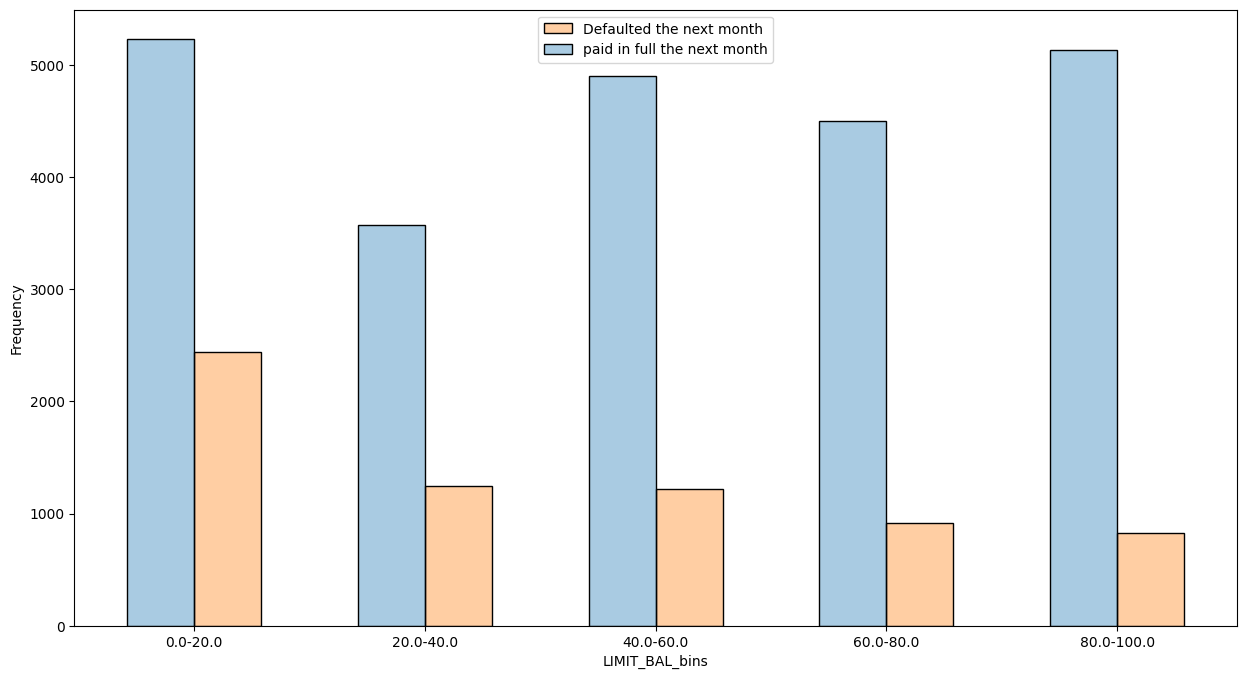

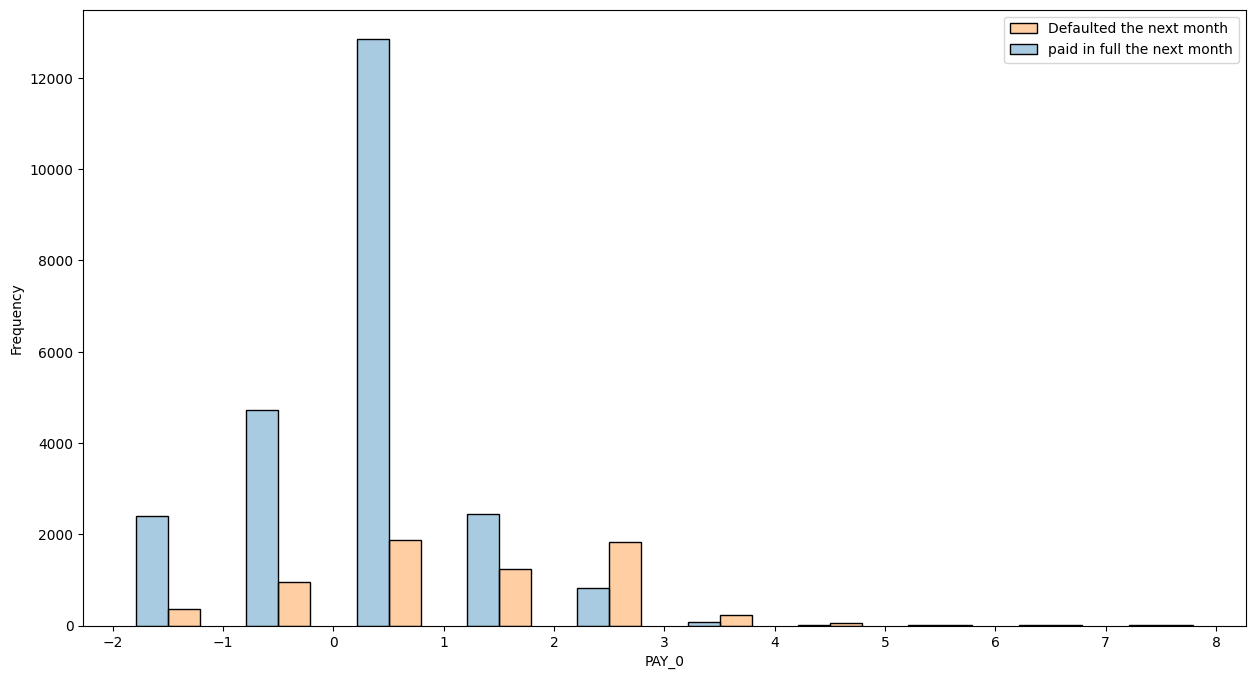

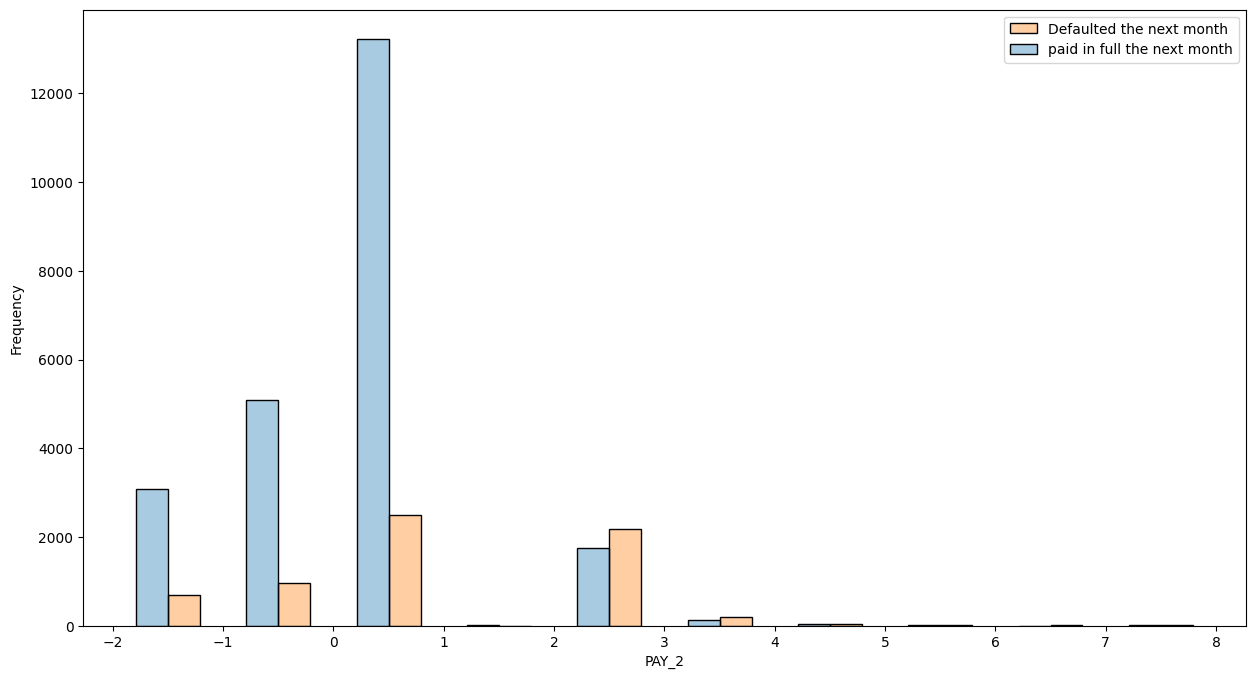

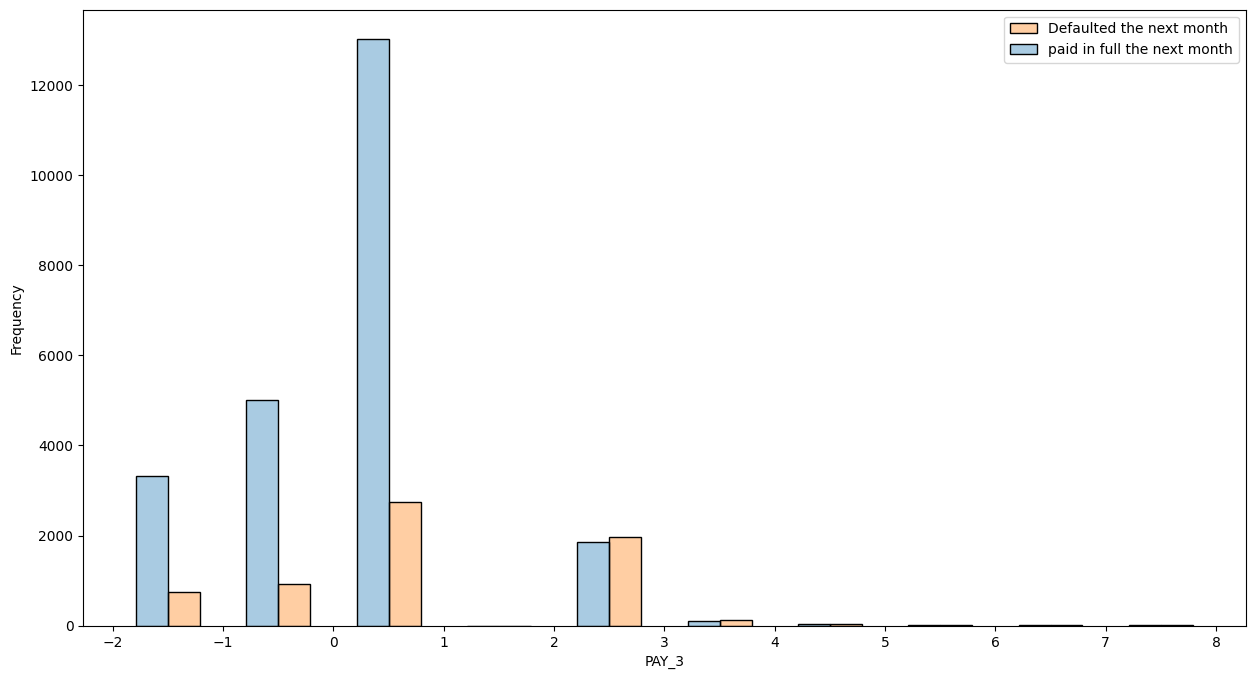

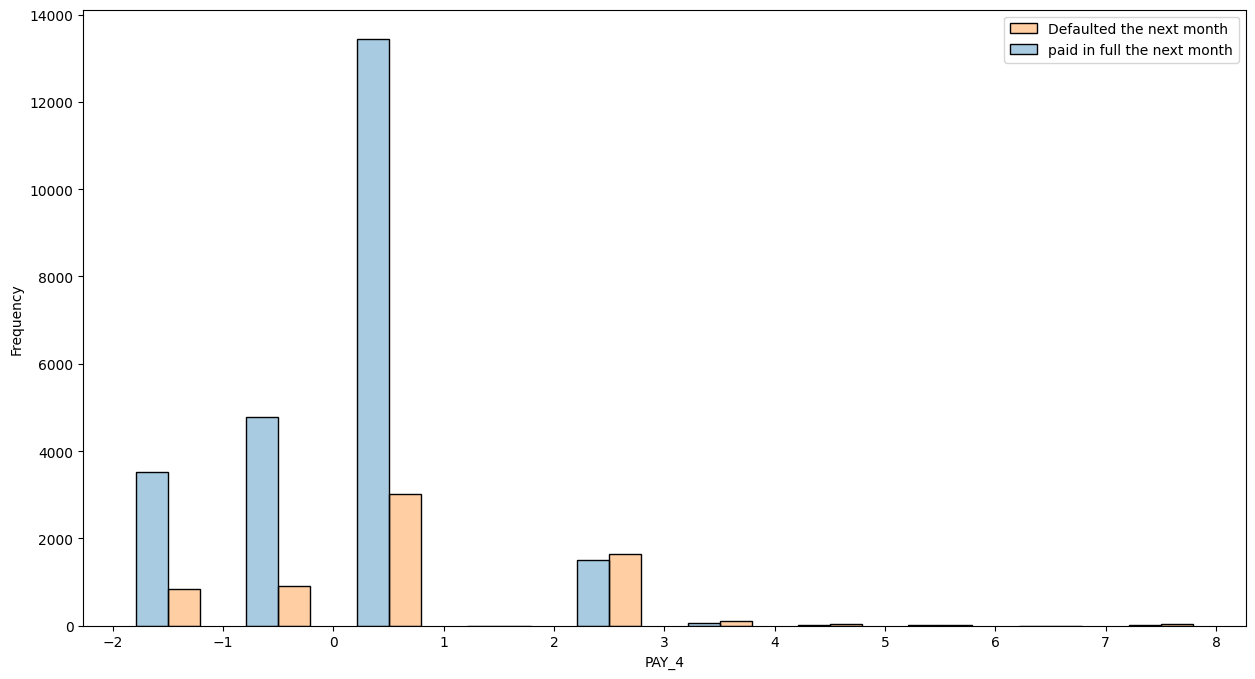

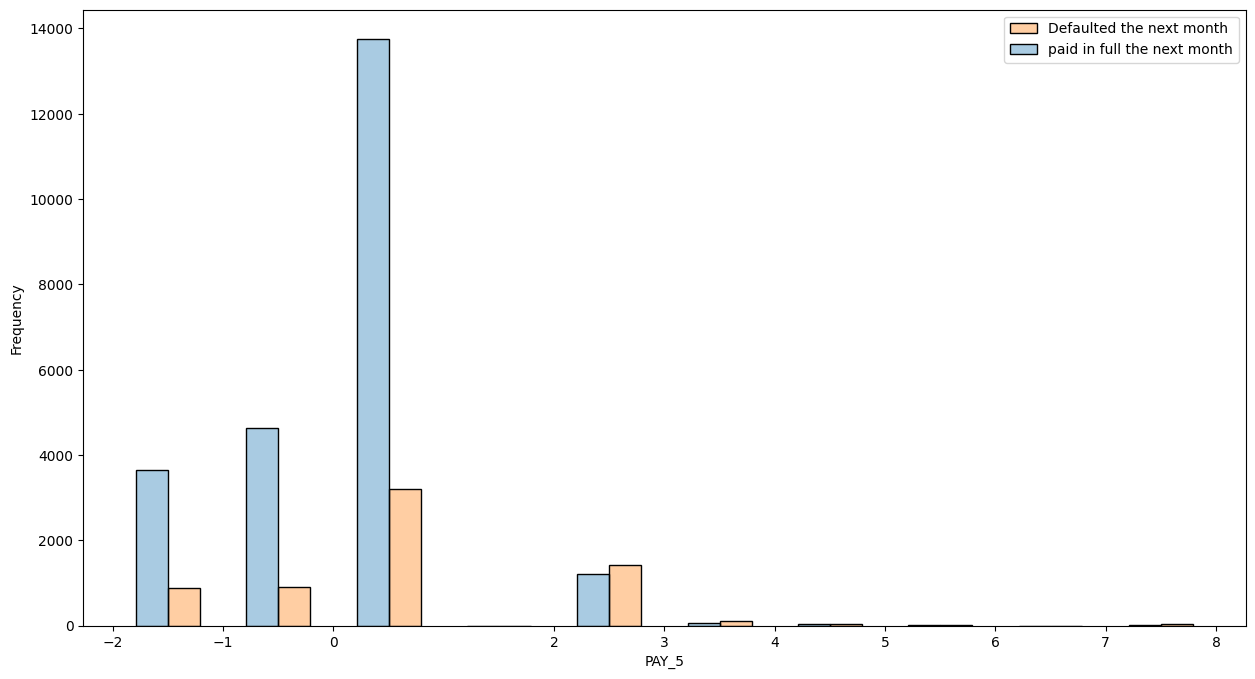

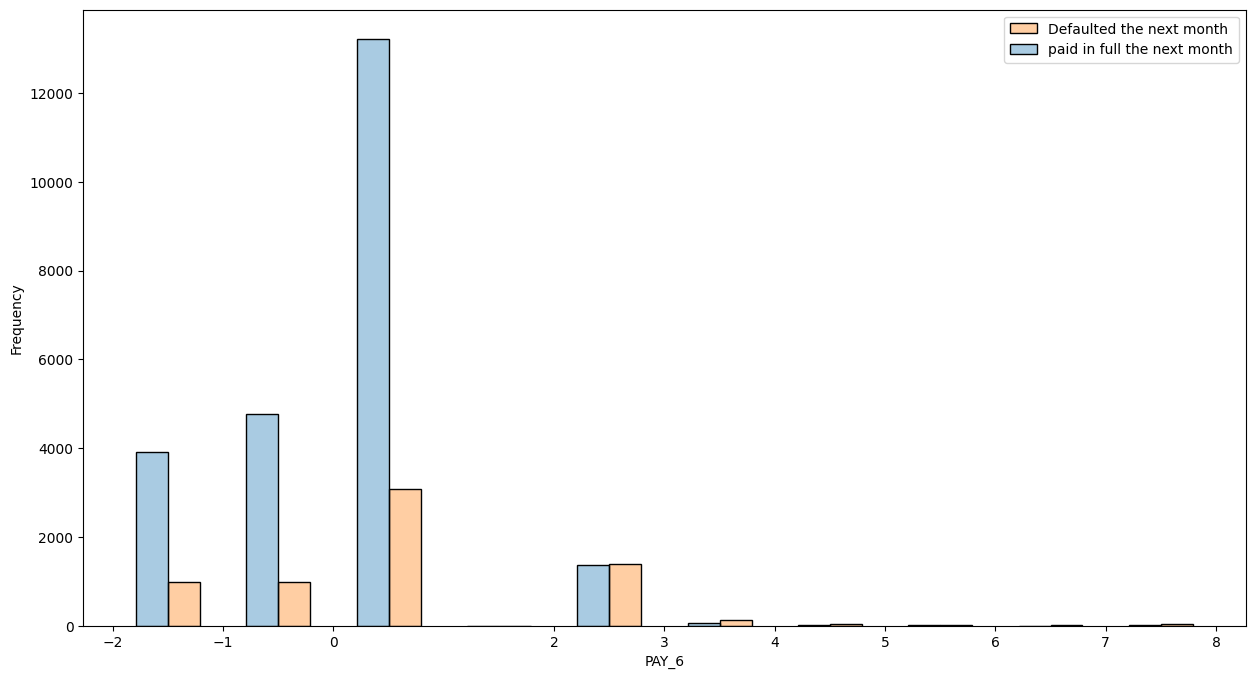

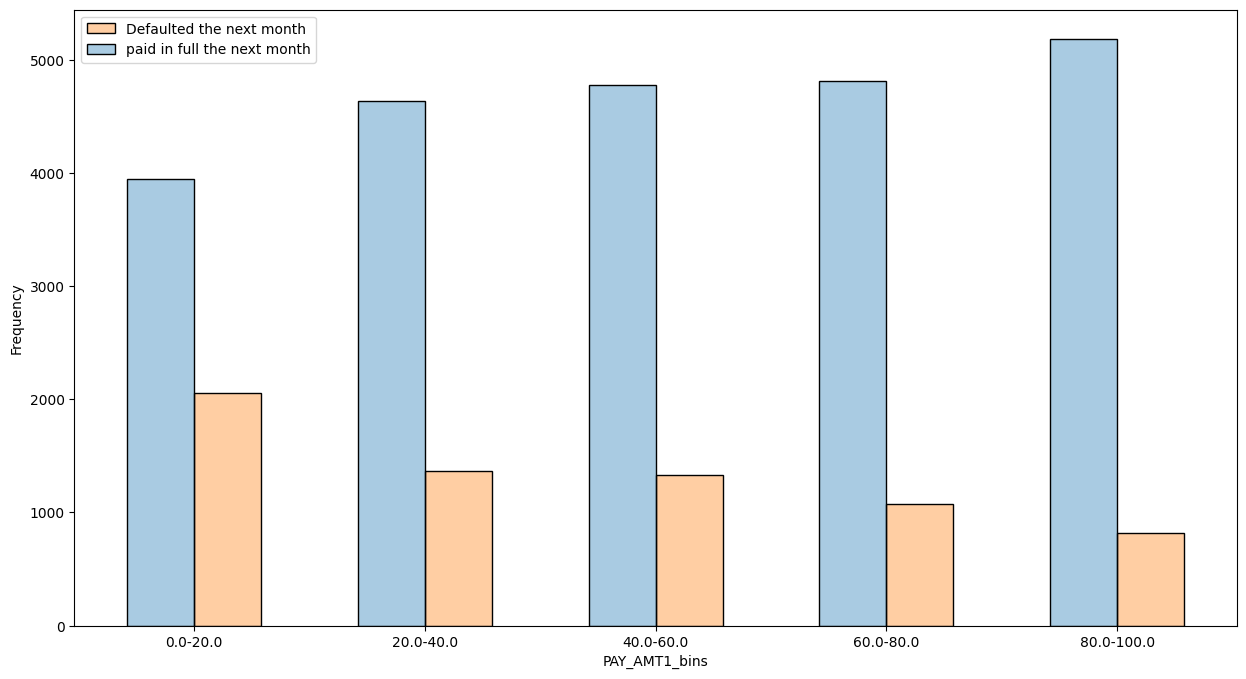

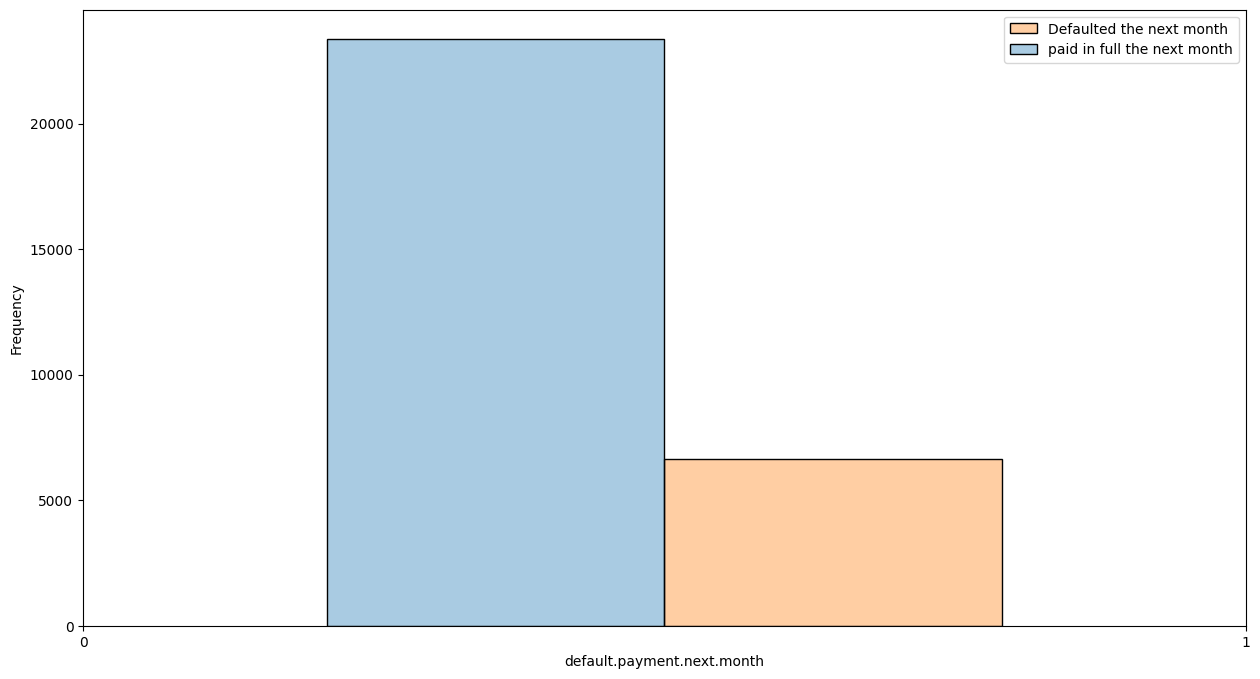

In [11]:
for column in impacting_cols_bins:     ### creating histograms for each discrete impacting column 
    plt.figure(figsize=(15, 8))  
    
    sns.histplot(data=vdf, x=column, hue='default.payment.next.month', 
                 multiple='dodge', alpha=0.38, 
                 legend=True,binwidth=1, shrink=0.58)
    
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(sorted(vdf[column].unique()))

    plt.legend([ 'Defaulted the next month', 'paid in full the next month'])
    plt.show()
    

looking at satistics of 'PAY_AMT1' and 'LIMIT_BAL' for those pay the next month and those who don't separately

In [227]:
separate_statistics = vdf.groupby('default.payment.next.month')[['PAY_AMT1','LIMIT_BAL']].agg(['mean', 'median', 'std'])
display(separate_statistics)

PAY_AMT1                            LIMIT_BAL  \
                                   mean  median           std           mean   
default.payment.next.month                                                     
0                           6307.337357  2459.5  18014.508990  178099.726074   
1                           3397.044153  1636.0   9544.252427  130109.656420   

                                                     
                              median            std  
default.payment.next.month                           
0                           150000.0  131628.359660  
1                            90000.0  115378.540571

we observe that those who default borrow less on average than those who don't

### Train-Test Split and Balancing the data

Splitting the dataset into a train and test set , and balancing the data to simplify the training and evaluation of models .

In [59]:
cdf = df.drop(['ID'], axis = 1)
X = cdf.drop(['default.payment.next.month'], axis = 1)
y = cdf['default.payment.next.month']

In [60]:
X_train_t, X_test, y_train_t, y_test = train_test_split(X, y, test_size=0.3,random_state=23, stratify = y)

In [61]:
rus = RandomUnderSampler(sampling_strategy="not minority") ### Randomly removes majority class samples 
                                                           ### to balance class distribution
X_train, y_train = rus.fit_resample(X_train_t, y_train_t)

In [36]:
y_train.value_counts()

default.payment.next.month
0    4645
1    4645
Name: count, dtype: int64

# Modelling

## Decision Tree

In [37]:

model = DecisionTreeClassifier()

kFold = StratifiedKFold(n_splits=5,shuffle=True , random_state =19)

parameter_grid = {'max_depth': [2,3,5,19,23,39]}

grid_search = GridSearchCV(model, parameter_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True,error_score='raise')

grid_search.fit(X_train, y_train)


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [2, 3, ...]}"
,scoring,'recall_weighted'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,'raise'
,return_train_score,True
,criterion,'gini'


In [91]:
print(f'best parameters are : {grid_search.best_params_}')
print(f'the accuracy score of the best parameter is: {grid_search.best_score_}')

best parameters are : {'max_depth': 5}
the accuracy score of the best parameter is: 0.6908503767491927


In [38]:
model = DecisionTreeClassifier(max_depth = 5)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [39]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[5795 1214]
 [ 878 1113]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7009
           1       0.48      0.56      0.52      1991

    accuracy                           0.77      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.77      0.77      9000



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.7146393972012917
Test Accuracy score: 0.7675555555555555


We got **Accuracy of 77% ** using Decision Tree Classifier.

# XGBOOST with early stopping  

we need to iterate manually over the folds during cross validation, as we want to enable early stopping.

In [43]:
 from itertools import product
    ### performs a cartesian product , ie : creates all possible p-tuples from a list of p arrays


param_grid = {
    
    'max_depth': [5,8],
    'learning_rate': [0.05,0.2,0.3],
    'n_estimators': [2000],               ### early stopping will stop adding estimators if there is not enough accuracy gain
    'scale_pos_weight': [1],
    'colsample_bytree': [0.8],
    'subsample': [0.8],
    'reg_alpha': [0],
    'reg_lambda': [2,3],
    'gamma': [0,0.1],
}


keys = param_grid.keys()
values = param_grid.values()
param_combinations = [dict(zip(keys, combo)) for combo in product(*values)] # Generates all parameter combinations in the form of dictionaries


kf = StratifiedKFold(n_splits=8, shuffle=True, random_state=23) ### setting up the Kfold
cv = list(kf.split(X,y))
results = []



for params in param_combinations:
    fold_scores = []
    
    for train_idx, val_idx in cv:
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        #Train with early stopping
        model = xgb.XGBClassifier(**params,
        early_stopping_rounds=39,
        random_state=2019
        )

        model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False 
        )
        

        y_pred = model.predict(X_val)                 
        avp = accuracy_score(y_val, y_pred)
        fold_scores.append(avp)
        
        

    
    results.append({                                   
        'params': params,
        'mean_score': np.mean(fold_scores),
        'std_score': np.std(fold_scores),
        'model': model
    })

# Find best parameters
best = min(results, key=lambda x: x['mean_score'])
print(f'Best params: {best["params"]}')
print(f'Best score: {best["mean_score"]:.5f}')

Best params: {'max_depth': 8, 'learning_rate': 0.3, 'n_estimators': 2000, 'scale_pos_weight': 1, 'colsample_bytree': 0.8, 'subsample': 0.8, 'reg_alpha': 0, 'reg_lambda': 2, 'gamma': 0}
Best score: 0.81873


In [46]:
model = xgb.XGBClassifier(**best['params'])
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [47]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[6913   96]
 [ 158 1833]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7009
           1       0.95      0.92      0.94      1991

    accuracy                           0.97      9000
   macro avg       0.96      0.95      0.96      9000
weighted avg       0.97      0.97      0.97      9000



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.9993142857142857
Test Accuracy score: 0.9717777777777777


remark : we note a significant increase in precision and recall scores across all classes using xgboost offers more complexity and regularization control.

# logistic regression

In [51]:

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler() , X.columns),
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',LogisticRegression())
])

param_grid = {
    'classifier__solver': ['saga'],  
    'classifier__penalty': ['l2'],
    'classifier__C': [0.1,2,3,10.0]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best params: {grid_search.best_params_}')
print(f'Accuracy: {grid_search.best_score_}')

Best params: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Accuracy: 0.8096761904761905


In [53]:
model = pipeline.set_params(**grid_search.best_params_)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [54]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[6824  185]
 [1521  470]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.72      0.24      0.36      1991

    accuracy                           0.81      9000
   macro avg       0.77      0.60      0.62      9000
weighted avg       0.80      0.81      0.77      9000



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.810247619047619
Test Accuracy score: 0.8104444444444444


remark : logistic regression is performing worse than xgboost on this dataset

**We Found that xgboost offered enhanced scores (precision and recall) across all classes when compared to decision tree and logistic regression**


<h3 align="center">Thank You</h3>